<a href="https://colab.research.google.com/github/mirpouya/Basics-of-ML/blob/main/Intermediate_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# generating dataset

data = pd.DataFrame({"X": np.random.normal(0,2,1000), "Y": np.random.normal(3,5,1000),
                     "Z": np.random.normal(-4,10,1000)})

data.head()

,X,Y,Z
0,1.549895,1.886300,-5.022643
1,-0.882322,8.093430,-3.859567
2,2.368842,3.862786,-12.277642
3,1.040284,12.871837,-6.861360
4,-1.497521,-3.376763,-0.984261


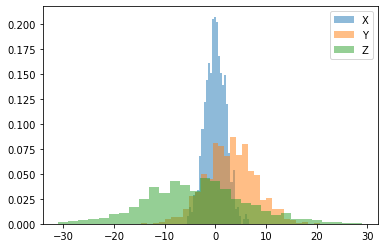

In [6]:
# plotting histograms with matplotlib

for col in data.columns:
  plt.hist(data[col], alpha=0.5, density=True, bins=30, label=col)
  plt.legend()

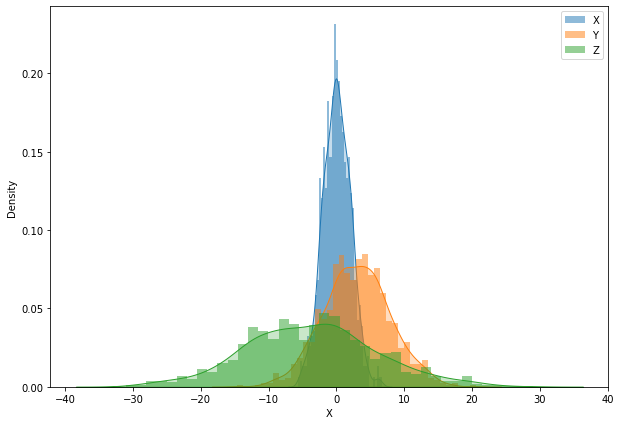

In [8]:
# plotting histograms with matplotlib

plt.figure(figsize=(10,7))

for col in data.columns:
  plt.hist(data[col], alpha=0.5, density=True, bins=40, label=col)

  # adding kernel density estimate plot
  sns.kdeplot(data[col], shade=True)
  plt.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

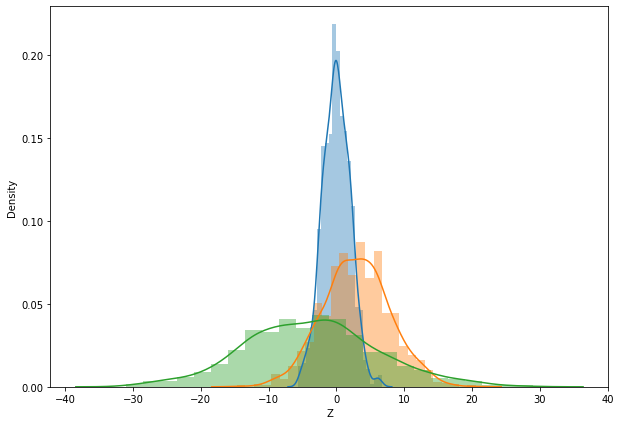

In [10]:
# doing the same with seaborn
plt.figure(figsize=(10,7))

for col in data:
  sns.distplot(data[col])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


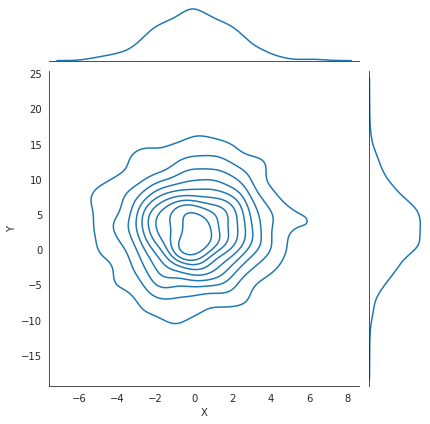

In [12]:
# joing distribution plots

with sns.axes_style("white"):
  sns.jointplot("X","Y", data, kind="kde")

In [13]:
iris = sns.load_dataset("iris")

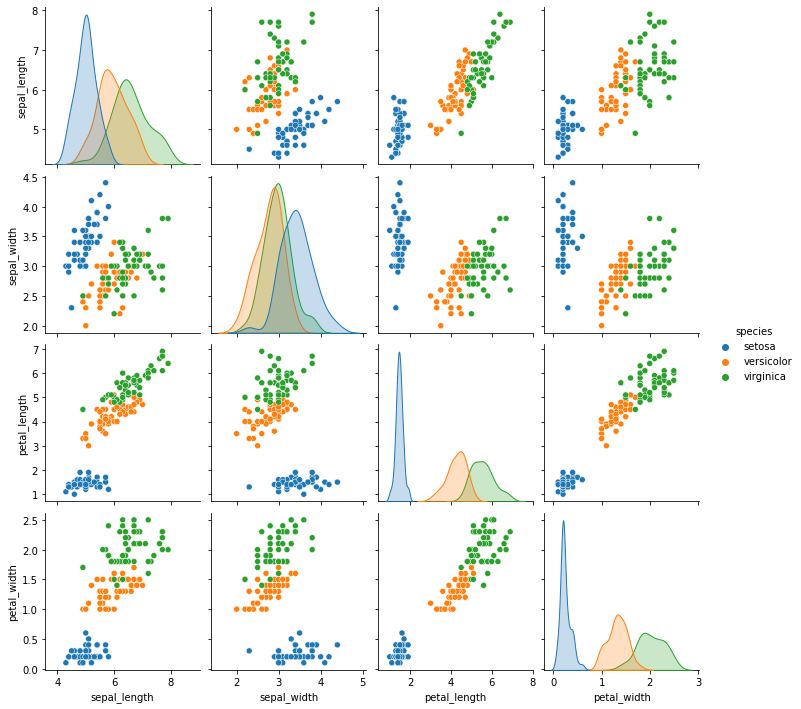

In [14]:
sns.pairplot(iris, hue="species")